# [IAPR][iapr]: Lab 1 ‒  Image segmentation


**Group ID:** 33

**Author 1 (sciper):** Student Name 1 (xxxxx)  
**Author 2 (sciper):** Student Name 2 (xxxxx)   
**Author 3 (sciper):** Student Name 3 (xxxxx)   

**Release date:** 11.03.2022
**Due date:** 25.03.2022 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.

[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-01-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library.

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [1]:
import tarfile
import os

data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-01-data'
tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')

if not os.path.exists(tar_path):
    raise Exception('Path to is not valid {}'.format(tar_path))
    
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

---
## Part 1: Brain segmentation

Your goal: compute the size of the brain (without the skull) in pixels in a 2D image of a human head taken by
Magnetic Resonance Imaging (MRI) using:
* Region growing (5 pts)
* Contour detection (5 pts)
* An additional method of your choice (5 pts)

Each section should display the resulting segmentation as well as the size in pixel of the detected region. Comment
each method limitations and/or advantages.

### 1.1 Brain image visualization

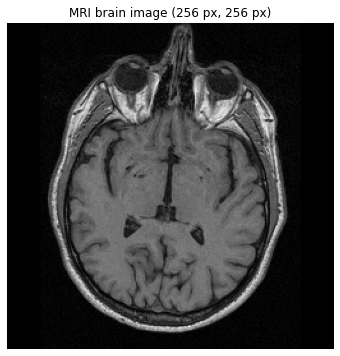

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

# Load image
data_path = os.path.join(data_base_path, data_folder)
brain_im = skimage.io.imread(os.path.join(data_path, 'brain-slice40.tiff'))
im_h, im_w = brain_im.shape

# Display MRI image
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.imshow(brain_im, cmap='gray')
ax.set_title('MRI brain image ({} px, {} px)'.format(im_h, im_w))
ax.axis('off')
plt.show()

### 1.2 Region growing (5pts)

In [3]:
# Add your implementation and discussion

### 1.3 Contour detection (5pts)

The detect the contour of the brain we will use cv2 package, in particular the Canny funciton, then we dilate and erode the image.

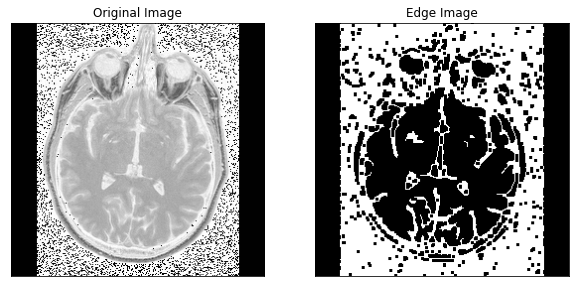

In [4]:
# Add your implementation and discussion
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# image = cv.GaussianBlur(brain_im, (7, 7), 0)          # Add a gaussian filter to filter out noise
image = 1 - brain_im                                    
edges = cv.Canny(image,70,170)                    # perform edge detection, then perform a dilation + erosion to
edges = cv.dilate(edges, None, iterations=1)          # close gaps in between object edges
edges = cv.erode(edges, None, iterations=1)

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(image,cmap = 'gray')
ax[0].set_title('Original Image')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].imshow(edges ,cmap = 'gray')
ax[1].set_title('Edge Image')
ax[1].set_xticks([])
ax[1].set_yticks([])
plt.show()

edges_r = edges - 1    #convert in order to have white background
contours, hierarchy = cv.findContours(edges.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

In the following we show how we are able to identify the contour of the brain. In order to have a better size estimate we will also remove the central part of the picture, which is not part of the brain.

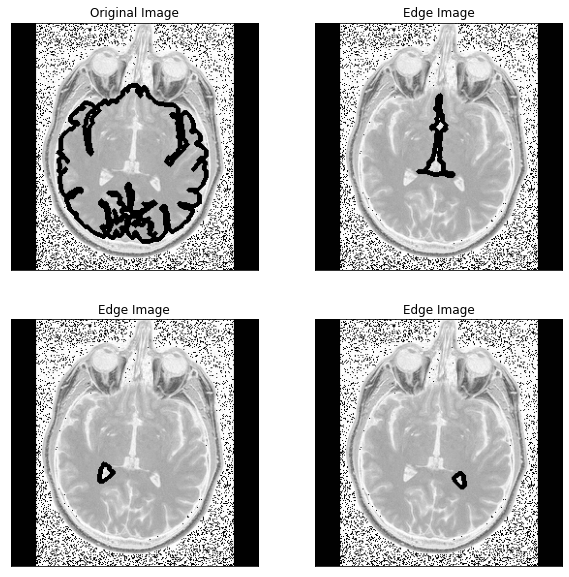

In [5]:
fig2, ax2 = plt.subplots(2, 2, figsize=(10, 10))
image = 1 - brain_im                                    # re-define the iamge to see the contours on a cleaned image
ax2[0,0].imshow(cv.drawContours(image, contours, 167, (0,255,0), 3),cmap = 'gray')
ax2[0,0].set_title('Original Image')
ax2[0,0].set_xticks([])
ax2[0,0].set_yticks([])
image = 1 - brain_im                                    # re-define the iamge to see the contours on a cleaned image
ax2[0,1].imshow(cv.drawContours(image, contours, 179, (0,255,0), 3),cmap = 'gray')
ax2[0,1].set_title('Edge Image')
ax2[0,1].set_xticks([])
ax2[0,1].set_yticks([])
image = 1 - brain_im                                    # re-define the iamge to see the contours on a cleaned image
ax2[1,0].imshow(cv.drawContours(image, contours, 172, (0,255,0), 3),cmap = 'gray')
ax2[1,0].set_title('Edge Image')
ax2[1,0].set_xticks([])
ax2[1,0].set_yticks([])
image = 1 - brain_im                                    # re-define the iamge to see the contours on a cleaned image
ax2[1,1].imshow(cv.drawContours(image, contours, 169, (0,255,0), 3),cmap = 'gray')
ax2[1,1].set_title('Edge Image')
ax2[1,1].set_xticks([])
ax2[1,1].set_yticks([])
plt.show()

In [6]:
area = np.array([cv.contourArea(contours[i]) for i in range(len(contours))])
brain_area = area[167] - area[179] - area[172] - area[169]
print(f"The brain is composed of {brain_area} pixels")

The brain is composed of 16336.5 pixels


### 1.4 Additional method (5pts)

In [7]:
# Add your implementation and discussion

---
## Part 2: Shape/color segmentation

You will find hereafter three pictures taken under three different illuminations, containing some shapes with different
colors. We ask you to create a routine to:

1. Count the number of shapes of each color (5pts).
2. Compute the total area (in pixels) of each color (5pts).

Please note that one specific challenge is to be robust to illumination changes. Therefore some kind of intensity
normalization should probably be used.

hint: RGB color space might not be optimal. Consider using HSV or LAB color space.

### 2.1 Visualization

In [8]:
# Load images
im_names = ['arena-shapes-01', 'arena-shapes-02', 'arena-shapes-03']
filenames = [os.path.join(data_path, name) + '.png' for name in im_names]
ic = skimage.io.imread_collection(filenames)
images = skimage.io.concatenate_images(ic)
print('Number of images: ', images.shape[0])
print('Image size: {}, {} '.format(images.shape[1], images.shape[2]))
print('Number of color channels: ', images.shape[-1])

Number of images:  3
Image size: 480, 640 
Number of color channels:  3


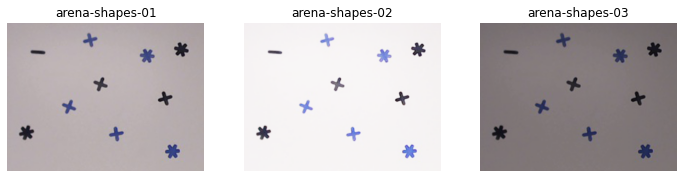

In [9]:
# Plot images
fig, axes = plt.subplots(1, 3, figsize=(12, 12))
for ax, im, nm in zip(axes.ravel(), images, im_names):
    ax.imshow(im)
    ax.axis('off')
    ax.set_title(nm)
plt.show()

### 2.2 Number of shapes of each color (5 pts)

In [10]:
# Add your implementation and discussion

### 2.3 Total area (in pixels) of each color (5 pts)

In [11]:
# Add your implementation and discussion